In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Read the data
df= pd.read_csv("C:\\Users\\HP\\Downloads\\Sales.csv")

In [5]:
#See first 10 rows
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
#see dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#Check for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#See descriptive statistics of numerical columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# Features and Target
X = df [['TV', 'Radio', 'Newspaper']]
y = df ['Sales']

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model Initialization
model = LinearRegression()

In [13]:
# Model Training
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (mae): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")

Mean Absolute Error (mae): 1.27
Mean Squared Error (MSE): 2.91
R-squared (R2 ): 0.91


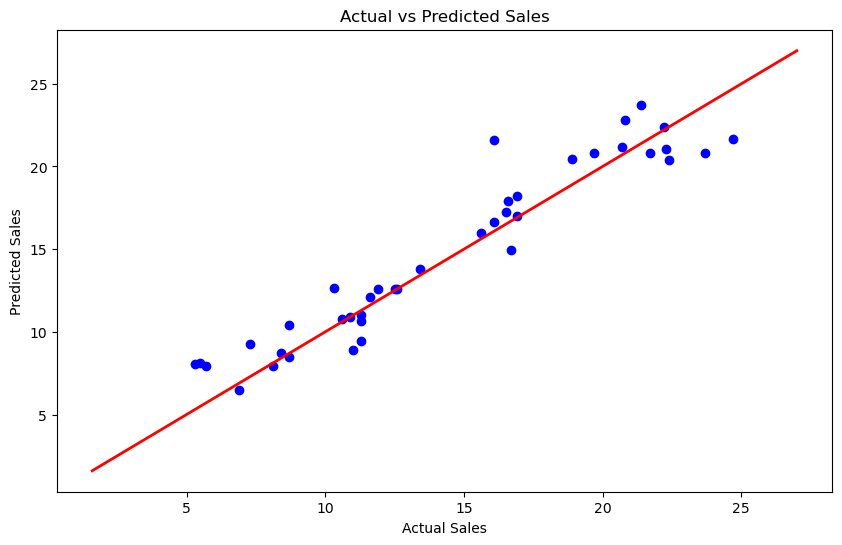

In [21]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [22]:
# Visualizing the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


In [23]:
# Predict sales for the entire dataset
df['Predicted Sales'] = model.predict(X)

In [25]:
# Find the highest predicted sales
max_sales = df['Predicted Sales'].max()
max_sales_row = df[df['Predicted Sales'] == max_sales]

print(f"The highest predicted sales are: {max_sales_row['Predicted Sales'].values[0]}")
print(f"Corresponding TV, Radio, and Newspaper spending: {max_sales_row[['TV', 'Radio', 'Newspaper']].values[0]}")

The highest predicted sales are: 25.04301451971768
Corresponding TV, Radio, and Newspaper spending: [287.6  43.   71.8]
